# Proyek Analisis Data: [E-Commerce Dataset]
- **Nama:** [Farhan Abdul Mukhlis]
- **Email:** [ngebackupdoang@gmail.com]
- **ID Dicoding:** [farhan_abdul_mukhlis_6syE]

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa penjualan dan revenue perusahaan dalam bulan terakhir?
- Penjualan Dengan produk paling tinggi dan paling rendah

## Import Semua Packages/Library yang Digunakan

In [55]:
!pip install streamlit
!pip install contextily
!pip install geopandas
!pip install geodatasets

In [56]:
import pandas as pd
import matplotlib
import seaborn
import pandas
import plotly
import streamlit
from plotly import *
from streamlit import *
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geodatasets import get_path

## Data Wrangling

### Gathering Data

In [57]:
customer_df = pd.read_csv('customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [58]:
geo_df = pd.read_csv('geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [59]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
product_df = pd.read_csv('products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [61]:
seller_df = pd.read_csv('sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [62]:
orderitems_df = pd.read_csv('order_items_dataset.csv')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
seller_df = pd.read_csv('sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
review_df = pd.read_csv('order_reviews_dataset.csv')
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [65]:
payment_df = pd.read_csv('order_payments_dataset.csv')
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
productctg_df = pd.read_csv('product_category_name_translation.csv')
productctg_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Mengambil data csv dengan mengubah bentuk menjadi dataframe : customer_df, geo_df, orders_df, product_df, seller_df, orderitems_df, seller_df, review_df. dimana untuk digunakan pada Assesing data, Cleaning data, sampai Visualize Data

### Assessing Data

####Menilai tabel `Customer_df`

In [67]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [68]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [69]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [70]:
customer_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


####Menilai tabel `Geo_df`

In [71]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [72]:
geo_df.nunique()

,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


In [73]:
geo_df.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


####Menilai tabel `Orders_df`

In [74]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [75]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [76]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [77]:
orders_df.duplicated().sum()

0

####Menilai tabel `Product_df`

In [78]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [79]:
product_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [80]:
product_df.duplicated().sum()

0

####Menilai tabel `Seller_df`

In [81]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [82]:
seller_df.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [83]:
seller_df.duplicated().sum()

0

####Menilai tabel `Orderitem_df`

In [84]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [85]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [86]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderitems_df[column] = pd.to_datetime(orderitems_df[column])

In [87]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [88]:
orderitems_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [89]:
orderitems_df.duplicated().sum()

0

####Menilai tabel `Review_df`

In [90]:
review_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [91]:
review_df.duplicated().sum()

0

####Menilai tabel `Payment_df`

In [92]:
payment_df.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [93]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


####Menilai tabel `Productctg_df`

In [94]:
productctg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [95]:
productctg_df.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


**Insight:**
- Membersihkan dataframe masing-masing tersebut melalui menghapus data kosong, menghapus data duplikat, mengubah beberapa kolom tipe data object menjadi waktu.

### Cleaning Data

#### Membersihkan tabel `orders_df`

In [96]:
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date","order_estimated_delivery_date","order_approved_at", "order_purchase_timestamp"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [97]:
orders_df.dropna(axis=0, inplace=True)

In [98]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [99]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [100]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Membersihkan tabel `product_df`

In [101]:
product_df.dropna(axis=0, inplace=True)

In [102]:
product_df.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### Membersihkan tabel `review_df`

In [103]:
review_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [104]:
review_df.fillna(value="[Not include comment]", inplace=True)

In [105]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,[Not include comment],[Not include comment],2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,[Not include comment],[Not include comment],2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,[Not include comment],[Not include comment],2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,[Not include comment],Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,[Not include comment],Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##Menggabungkan beberapa data

In [106]:
#Hubungan Waktu pengiriman dan Review Score
revieworder_df = pd.merge(
    left=orders_df,
    right=review_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [107]:
revieworder_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,[Not include comment],"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,[Not include comment],[Not include comment],2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,[Not include comment],O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,[Not include comment],[Not include comment],2018-02-17 00:00:00,2018-02-18 13:02:51


In [108]:
#Deskripsi Product
nameproduct_df = pd.merge(
    left=product_df,
    right=productctg_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [109]:
nameproduct_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [110]:
#Deskripsi Product
sellerproduct_df = pd.merge(
    left=orderitems_df,
    right=seller_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

In [111]:
sellerproduct_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [112]:
#Deskripsi Customer
tes_df = pd.merge(
    left=orders_df,
    right=customer_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

In [113]:
#Deskripsi Customer
customerproduct_df = pd.merge(
    left=tes_df,
    right=payment_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [114]:
customerproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   customer_unique_id             100739 non-null  object        
 9   customer_zip_code_prefix       100739 non-null  int64         
 10  customer_city                  100739 non-null  object        
 11  

In [115]:
# Menghapus kolom #2, 3, 4, 5, 6, dan 7
columns_to_drop = [customerproduct_df.columns[i] for i in [2, 3, 4, 5, 6, 7]]  # Mendapatkan nama kolom berdasarkan indeks
customerproduct_df = customerproduct_df.drop(columns=columns_to_drop)

In [116]:
customerproduct_df.head()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


**Insight:**
- Menggabungkan data dari data frame : revieworders_df yakni review_df dan orders_df
- Menggabungkan data dari data frame : nameproduct_df yakni product_df dan productctg_df
- Menggabungkan data dari data frame : sellerproduct_df yakni seller_df dan orderitems_df
- Menggabungkan data dari data frame : customerproduct_df yakni customer_df, orders_df, payment_df

Dimana ke empat penggabungan tersebut menggunakan **Innerjoin** yakni proses menggabungkan data dimana data saling beririsan

## Exploratory Data Analysis (EDA)

### Explore Customerproduct_df


In [117]:
customerproduct_df.sample(5)

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
91031,83bdd2499feae1bac3b451293f37ebf6,42329f6f9ded091237c82dd2a87dab28,ab7d9fdcd69ca947247b4fd6e3dd5001,29100,vila velha,ES,1,credit_card,1,75.88
33496,c145341df96866c0282d832acbda1225,ec3ec417b16fb18d288705ec41bdd297,288ae9eef8aea0a10244894a9688b226,13327,salto,SP,1,boleto,1,132.22
57532,775d392cdf78d7ec8e6dedacbec03a9d,dbcefd1a7ba4bc8b7aff36b386e0cc72,dfc0c5d53678c35744d82e35d30580a9,12946,atibaia,SP,1,credit_card,2,434.92
44957,95dda89c1cb224cddb6c5e1d81d4666c,b34d56bfad36d98cb3defe73359c7dea,785350657e82cd7e13ba1e6a82bb62ab,92500,guaiba,RS,1,credit_card,1,36.94
81026,e0be387e4482cc1e135c5ffe3d896885,78044ea05d807cf1a0d4ed51c4064c11,49e3dd51659577fd2fff8f09779586af,7142,guarulhos,SP,1,credit_card,2,126.54


In [118]:
customerproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100739 entries, 0 to 100738
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  100739 non-null  object 
 1   customer_id               100739 non-null  object 
 2   customer_unique_id        100739 non-null  object 
 3   customer_zip_code_prefix  100739 non-null  int64  
 4   customer_city             100739 non-null  object 
 5   customer_state            100739 non-null  object 
 6   payment_sequential        100739 non-null  int64  
 7   payment_type              100739 non-null  object 
 8   payment_installments      100739 non-null  int64  
 9   payment_value             100739 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 7.7+ MB


In [119]:
customerproduct_df.describe(include="all")

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,100739,100739,100739,100739.000000,100739,100739,100739.000000,100739,100739.000000,100739.000000
unique,96460,96460,93341,NaN,4085,27,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,26,26,33,NaN,15696,42296,NaN,74584,NaN,NaN
mean,NaN,NaN,NaN,35126.620356,NaN,NaN,1.088387,NaN,2.851894,153.065673
std,NaN,NaN,NaN,29779.959615,NaN,NaN,0.652783,NaN,2.684496,214.465614
min,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,11385.000000,NaN,NaN,1.000000,NaN,1.000000,56.780000
50%,NaN,NaN,NaN,24421.000000,NaN,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,NaN,NaN,58702.000000,NaN,NaN,1.000000,NaN,4.000000,171.290000


In [120]:
customerproduct_df.customer_id.is_unique

False

In [121]:
customerproduct_df.customer_id.duplicated(
).sum()

4279

In [122]:
customerproduct_df.groupby(by="customer_city").agg({
    "customer_id": "nunique",
    "payment_value": ["max", "min", "mean", "std", ]
})

customer_id payment_value                        \
                        nunique           max      min         mean   
customer_city                                                         
abadia dos dourados           3        219.63    58.28   137.833333   
abadiania                     1       1025.52  1025.52  1025.520000   
abaete                       11        466.89    50.27   162.961818   
abaetetuba                   11       1537.04    31.94   389.355833   
abaiara                       2        200.45   131.70   166.075000   
...                         ...           ...      ...          ...   
xinguara                      9        608.67    57.28   178.723333   
xique-xique                   3        124.09    48.69    76.853333   
zacarias                      2        161.44    68.41   114.925000   
ze doca                       5        408.04    66.51   175.784000   
zortea                        2         90.88    46.69    68.785000   

                                 
                            std  
customer_city                    
abadia dos dourados   80.698389  
abadiania                   NaN  
abaete               120.012636  
abaetetuba           457.251115  
abaiara               48.613591  
...                         ...  
xinguara             173.263049  
xique-xique           41.159859  
zacarias              65.782144  
ze doca              137.205171  
zortea                31.247049  

[4085 rows x 5 columns]

In [123]:
customerproduct_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "payment_value": ["max", "min", "mean", "std", ]
})

customer_id payment_value                               
                   nunique           max    min        mean         std
customer_state                                                         
AC                      80       1251.70  11.58  235.978916  218.857292
AL                     397       2269.98   1.33  229.186837  277.386461
AM                     145       1853.75   0.66  182.756159  237.148642
AP                      67       1482.42  34.80  233.939275  277.815974
BA                    3256       3358.24   0.10  169.759001  240.545031
CE                    1278       2734.11   0.52  198.774000  241.813194
DF                    2080       3736.22   0.67  161.599519  234.306395
ES                    1995       7274.88   0.00  153.618303  268.498190
GO                    1957       2794.50   0.00  163.309340  210.335701
MA                     716       3195.73   2.27  201.226812  252.212129
MG                   11352       6081.54   0.01  154.128960  207.463394
MS                     701       6929.31   1.74  186.179418  355.256978
MT                     886       3242.84   1.23  199.605853  266.389734
PA                     946       4042.74   2.31  216.134098  278.754492
PB                     517       4681.78   1.21  250.153630  384.500942
PE                    1593       3792.59   0.52  185.407672  235.814281
PI                     476       1989.75   3.35  208.873353  243.608335
PR                    4923       3126.50   0.03  152.450682  205.498182
RJ                   12351      13664.08   0.00  158.083692  240.799768
RN                     474       1821.82   5.43  197.119961  233.749538
RO                     243       2452.12   3.29  226.994821  297.040220
RR                      41        994.77  39.03  220.476098  213.899272
RS                    5342       2455.12   0.08  155.396923  188.313163
SC                    3547       3666.42   0.34  162.578348  224.367756
SE                     335       1729.98   0.39  204.328866  230.011715
SP                   40488       6726.66   0.01  136.380629  186.557058
TO                     274       2784.16   1.93  203.414814  280.096920

In [124]:
customerproduct_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15044
rio de janeiro,6603
belo horizonte,2697
brasilia,2071
curitiba,1489
...,...
ponto novo,1
ponto do marambaia,1
ponto belo,1


In [125]:
customerproduct_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,40488
RJ,12351
MG,11352
RS,5342
PR,4923
SC,3547
BA,3256
DF,2080
ES,1995


In [126]:
customerproduct_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_zip_code_prefix,
22790,136
24230,117
22793,116
24220,115
22775,103
...,...
76842,1
37514,1
76860,1


In [127]:
customerproduct_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False)

,customer_id
payment_type,
credit_card,74302
boleto,19177
voucher,3679
debit_card,1484


### Explore nameproduct_df

In [128]:
nameproduct_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
14389,2ba4f78910f6fe61e7ae7bfa4efe2726,cama_mesa_banho,55.0,225.0,1.0,380.0,34.0,21.0,40.0,bed_bath_table
3997,ff6154cee42bf2718cca4865f0620e04,ferramentas_jardim,30.0,139.0,1.0,600.0,24.0,22.0,24.0,garden_tools
32114,e19c52ba2deb45c56077643f204eda1e,fashion_bolsas_e_acessorios,49.0,566.0,1.0,100.0,22.0,2.0,19.0,fashion_bags_accessories
24381,fab8297a9d2e7e1e756998675831f7e9,pet_shop,63.0,1440.0,3.0,6700.0,40.0,20.0,50.0,pet_shop
12909,bd4007f3a50676aa56e2696897f4a706,esporte_lazer,49.0,613.0,4.0,3900.0,30.0,80.0,20.0,sports_leisure


In [129]:
nameproduct_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32327,32327,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327
unique,32327,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.473722,771.517277,2.188790,2276.960807,30.856498,16.955950,23.208464,NaN
std,NaN,NaN,10.246346,635.189674,1.736767,4279.734063,16.958460,13.637246,12.080665,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000,NaN


In [130]:
nameproduct_df.product_id.is_unique

True

In [131]:
nameproduct_df.product_id.duplicated().sum()

0

In [132]:
# prompt: customers_df.groupby(by="gender").agg({
#     "customer_id": "nunique",
#     "age": ["max", "min", "mean", "std", ]
# })
# sesuaikan dengan nameproduct_df coba product_category_name_english dengan product_name_lenght	product_description_lenght	product_photos_qty	product_weight_g	product_length_cm	product_height_cm	product_width_cm

nameproduct_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_name_lenght": ["max", "min", "mean", "std"],
    "product_description_lenght": ["max", "min", "mean", "std"],
    "product_photos_qty": ["max", "min", "mean", "std"],
    "product_weight_g": ["max", "min", "mean", "std"],
    "product_length_cm": ["max", "min", "mean", "std"],
    "product_height_cm": ["max", "min", "mean", "std"],
    "product_width_cm": ["max", "min", "mean", "std"],
})


product_id product_name_lenght                   \
                                 nunique                 max   min       mean   
product_category_name_english                                                   
agro_industry_and_commerce            74                60.0  22.0  49.108108   
air_conditioning                     124                63.0  26.0  51.661290   
art                                   55                62.0  24.0  47.090909   
arts_and_craftmanship                 19                60.0  20.0  44.263158   
audio                                 58                63.0  17.0  46.551724   
...                                  ...                 ...   ...        ...   
stationery                           849                64.0  18.0  49.694935   
tablets_printing_image                 9                64.0  34.0  54.000000   
telephony                           1134                64.0  16.0  50.450617   
toys                                1411                64.0   8.0  45.119773   
watches_gifts                       1329                63.0  17.0  49.803612   

                                         product_description_lenght         \
                                     std                        max    min   
product_category_name_english                                                
agro_industry_and_commerce      8.377346                     3177.0   93.0   
air_conditioning                7.939699                     3270.0   80.0   
art                            10.628879                     3954.0   59.0   
arts_and_craftmanship          11.371710                     1611.0   99.0   
audio                          11.787850                     2916.0   68.0   
...                                  ...                        ...    ...   
stationery                      8.785305                     2614.0   32.0   
tablets_printing_image          8.958236                     2532.0  145.0   
telephony                       9.727747                     3923.0   43.0   
toys                           11.254274                     3925.0   20.0   
watches_gifts                   8.567668                     3355.0   66.0   

                                                      product_photos_qty  ...  \
                                     mean         std                max  ...   
product_category_name_english                                             ...   
agro_industry_and_commerce     807.756757  618.289018                8.0  ...   
air_conditioning               902.822581  697.829318                7.0  ...   
art                            678.345455  646.063757               10.0  ...   
arts_and_craftmanship          620.421053  361.324003                7.0  ...   
audio                          781.965517  582.462467                6.0  ...   
...                                   ...         ...                ...  ...   
stationery                     439.128386  366.578506               10.0  ...   
tablets_printing_image         676.444444  743.146707                7.0  ...   
telephony                      755.327160  553.661242               13.0  ...   
toys                           686.314670  473.601098               20.0  ...   
watches_gifts                  611.979684  356.174299               10.0  ...   

                              product_length_cm            product_height_cm  \
                                           mean        std               max   
product_category_name_english                                                  
agro_industry_and_commerce            36.527027  18.621113             105.0   
air_conditioning                      36.467742  18.912050              76.0   
art                                   35.927273  20.836093              62.0   
arts_and_craftmanship                 28.368421  20.819890              25.0   
audio                                 20.827586   5.544518              31.0   
...                        

In [133]:
# prompt: customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)
# sesuaikan dengan nameproduct_df coba pilih yang cocok antara : product_category_name_english product_name_lenght	product_description_lenght	product_photos_qty	product_weight_g	product_length_cm	product_height_cm	product_width_cm

nameproduct_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)


,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


### Explore Revieworder_df


In [134]:
revieworder_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
40349,123609d09763b3bd86c2046f54b391e6,b00f783912a7d0c7499f43d21afe63fb,delivered,2017-08-26 00:23:01,2017-08-26 00:35:25,2017-08-28 15:47:35,2017-08-29 16:00:09,2017-09-08,1f6dd7c9d19f2d47811b229555fcf8a2,5,[Not include comment],[Not include comment],2017-08-30 00:00:00,2017-08-30 22:48:47
80369,8dd925f0031d0e5f405cb0f3ed25edd9,c180f565ea0f5d52d645ce90be20821e,delivered,2018-04-21 17:34:58,2018-04-24 18:05:40,2018-04-23 18:44:27,2018-04-24 19:24:19,2018-05-02,0fd61de7c5ba24e68dda5925e917c66a,4,[Not include comment],[Not include comment],2018-04-25 00:00:00,2018-04-28 01:17:20
42852,7a72862f08ad9a6b9debda8e2a65d762,49269e49bdad7f64f75afaf5939326c2,delivered,2017-03-10 19:47:34,2017-03-10 19:47:34,2017-03-15 07:32:12,2017-03-29 12:57:35,2017-04-18,46aa90ce01cf1cfde093294cad8d4f51,5,[Not include comment],produto muito bom nota 10,2017-03-30 00:00:00,2017-03-31 08:00:29
88925,75f689c38282dd59efedf0e5b2e130ee,d9cb5362ceac64faee7d4ccbe948f925,delivered,2018-06-11 22:30:45,2018-06-13 02:37:05,2018-06-15 05:37:00,2018-06-19 19:56:26,2018-07-03,04527339b11cf86dbc00c5f1d707ec9a,5,[Not include comment],[Not include comment],2018-06-20 00:00:00,2018-06-25 13:13:16
36393,2e40f4ca6760b2209d72989c1533fe0c,01e92a3b160b9a3751ffc7cf52dbed77,delivered,2018-03-07 22:44:08,2018-03-07 22:55:31,2018-03-09 05:32:23,2018-03-19 20:09:48,2018-05-08,e6295cba977375f11a9d0322a43be72c,5,[Not include comment],Bom,2018-03-20 00:00:00,2018-03-20 23:52:41


In [135]:
revieworder_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,96344,96344,96344,96344,96344,96344,96344,96344,96344,96344.000000,96344,96344,96344,96344
unique,95815,95815,2,NaN,NaN,NaN,NaN,NaN,95630,NaN,4365,34436,627,95477
top,df56136b8031ecd28e200bb18e6ddb2e,b7770073b02ed1d626a027ce86a4ff82,delivered,NaN,NaN,NaN,NaN,NaN,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,NaN,[Not include comment],[Not include comment],2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,96338,NaN,NaN,NaN,NaN,NaN,3,NaN,85140,57251,449,4
mean,NaN,NaN,NaN,2018-01-01 19:34:10.952513792,2018-01-02 05:50:58.788154880,2018-01-05 00:55:29.120630272,2018-01-14 08:07:03.195756800,2018-01-25 13:21:57.080461824,NaN,4.155516,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 22:00:13.750000128,2017-09-14 09:46:29,2017-09-18 13:28:03.750000128,2017-09-25 20:53:19.750000128,2017-10-05 00:00:00,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 17:36:59.500000,2018-01-20 23:52:32,2018-01-24 13:51:39,2018-02-02 17:47:55,2018-02-16 00:00:00,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 16:06:36,2018-05-05 22:19:08.750000128,2018-05-08 14:12:00,2018-05-15 21:11:03.750000128,2018-05-28 00:00:00,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,5.000000,NaN,NaN,NaN,NaN


In [136]:
revieworder_df.order_id.is_unique

False

In [137]:
revieworder_df.duplicated().sum()

0

In [138]:
revieworder_df.groupby(by="review_score").agg({
    "order_id": "nunique",
    "order_purchase_timestamp": ["max", "min"],
})

revieworder_df.groupby(by="order_status").agg({
    "order_id": "nunique",
    "order_purchase_timestamp": ["max", "min"],
})


order_id order_purchase_timestamp                    
              nunique                      max                 min
order_status                                                      
canceled            6      2018-02-19 19:48:52 2016-10-03 21:01:41
delivered       95809      2018-08-29 15:00:37 2016-09-15 12:16:38

In [139]:
revieworder_df.groupby(by="review_score").customer_id.nunique().sort_values(ascending=False)


,customer_id
review_score,
5,56802
4,18939
1,9384
3,7942
2,2937


In [140]:
revieworder_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)


,customer_id
order_status,
delivered,95809
canceled,6


In [141]:
import pandas as pd
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

revieworder_df = pd.merge(
    left=orders_df,
    right=review_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)


In [142]:
outliers = revieworder_df[revieworder_df["delivery_time"] >= 100]
print(outliers)

revieworder_df = revieworder_df[revieworder_df["delivery_time"] < 100]

                               order_id                       customer_id  \
1574   a4efaffc506a395c9cea7402b078c1e5  2020559b0ae9910898ef57a8159533ab   
2989   8b7fd198ad184563c231653673e75a7f  3eddc75fe2314996f68ddcd89ddb5caf   
3109   4f39a94d6e474819d898d6df7d394996  27a410dccb395b6ce45963874d158352   
4523   b31c7dea63bb08f8cdd1ec32514ccf0b  2a351c540a0cbdd0d9c266626f6d3acc   
10096  3602a80b09d914236f74c733631f3b8b  367000b9bd508db790e048df2f6d6af9   
...                                 ...                               ...   
89351  29c3b79aace1b72a82b1232bf494e16f  9225e82d7b09bfc606f1849de9300050   
91076  4a580bca631a940ffc9e25c96da01773  dbd8419d89e2d12f79322167e68e6225   
92185  17cc6728043d53cc948551dfbf0a338b  dcfb92c7e6d519560090aeb5bfa03f0c   
93552  201ebbf7634b25abd400f84d519cf297  a6e1d325e2d80b387efb2a91ae78568b   
95169  2e56f943f231f5fe108f43fb370b0ed6  66b9bc2d53ea09b027966337424fa0c7   

      order_status order_purchase_timestamp   order_approved_at  \
1574    

In [143]:
revieworder_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4,[Not include comment],"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,5,[Not include comment],[Not include comment],2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,359d03e676b3c069f62cadba8dd3f6e8,5,[Not include comment],O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,e50934924e227544ba8246aeb3770dd4,5,[Not include comment],[Not include comment],2018-02-17 00:00:00,2018-02-18 13:02:51


In [144]:
revieworder_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,96280,96280,96280,96280,96280,96280,96280,96280,96280.000000,96280,96280.000000,96280,96280,96280,96280
unique,95751,95751,2,NaN,NaN,NaN,NaN,NaN,NaN,95566,NaN,4365,34400,627,95414
top,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,NaN,NaN,NaN,NaN,NaN,NaN,0c76e7a547a531e7bf9f0b99cba071c1,NaN,[Not include comment],[Not include comment],2018-08-28 00:00:00,2017-06-15 23:21:05
freq,3,3,96274,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,85076,57226,449,4
mean,NaN,NaN,NaN,2018-01-01 21:37:07.656314880,2018-01-02 07:53:58.625986816,2018-01-05 02:52:09.862712832,2018-01-14 08:06:14.227025664,2018-01-25 15:20:08.774407936,12.395523,NaN,4.156336,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 22:56:29.500000,2017-09-14 10:45:12.500000,2017-09-18 14:48:11,2017-09-25 21:13:48,2017-10-05 00:00:00,7.000000,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 18:38:34,2018-01-22 13:47:16.500000,2018-01-24 15:35:11.500000,2018-02-02 17:47:55,2018-02-16 00:00:00,10.000000,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 17:00:40,2018-05-05 23:56:19.500000,2018-05-08 14:18:00,2018-05-15 21:16:26.249999872,2018-05-28 00:00:00,16.000000,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-02 00:18:50,2018-10-25 00:00:00,98.000000,NaN,5.000000,NaN,NaN,NaN,NaN


<Axes: >

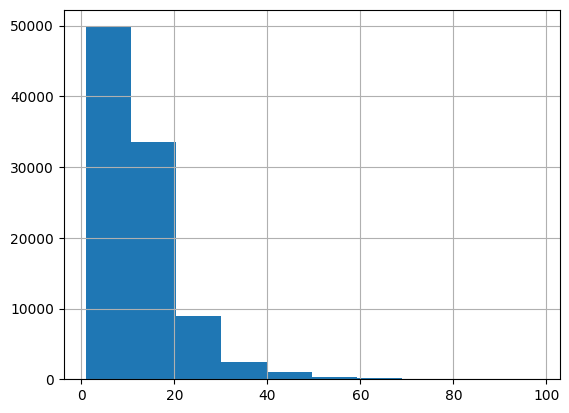

In [145]:
revieworder_df.delivery_time.hist()

In [146]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [147]:
#udah di run
customer_ids_with_delivery = revieworder_df['customer_id'].unique()
revieworder_df["status"] = revieworder_df["customer_id"].apply(lambda x: "Active" if x in customer_ids_with_delivery else "Non Active")

print(revieworder_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15

In [148]:
if 'customer_status' in revieworder_df.columns:
    revieworder_df_df = revieworder_df.drop(columns=['customer_status'])
    print("Column 'customer_status' deleted successfully.")
else:
    print("Column 'customer_status' not found in the DataFrame.")


Column 'customer_status' not found in the DataFrame.


In [149]:
revieworder_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,96280


In [150]:
sellerproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                112650 non-null  object        
 1   order_item_id           112650 non-null  int64         
 2   product_id              112650 non-null  object        
 3   seller_id               112650 non-null  object        
 4   shipping_limit_date     112650 non-null  datetime64[ns]
 5   price                   112650 non-null  float64       
 6   freight_value           112650 non-null  float64       
 7   seller_zip_code_prefix  112650 non-null  int64         
 8   seller_city             112650 non-null  object        
 9   seller_state            112650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 8.6+ MB


In [151]:
sellerproduct_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,sao paulo,SP
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN,27983,80342
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,24439.170431,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,13568.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,27930.000000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000,NaN,NaN


In [152]:
sellerproduct_df.seller_id.is_unique


False

In [153]:
sellerproduct_df.seller_id.duplicated().sum()



109555

In [154]:
sellerproduct_df.groupby(by="seller_city").agg({
    "seller_id": "nunique",
    "price": ["max", "min", "mean", "std"],
    "freight_value": ["max", "min", "mean", "std"],
})


seller_id   price                                  \
                  nunique     max     min        mean         std   
seller_city                                                         
04482255                1  399.90  399.90  399.900000         NaN   
abadia de goias         1  142.47  142.47  142.470000         NaN   
afonso claudio          1   99.00   18.90   48.998333   39.528000   
aguas claras df         1   35.00   35.00   35.000000         NaN   
alambari                1   29.90   19.00   27.720000    4.874628   
...                   ...     ...     ...         ...         ...   
volta redonda           2  387.10   39.90   83.043526   49.923450   
votorantim              4  289.00   15.90   76.550916   59.467209   
votuporanga             4  575.50    8.50  152.952681   80.186247   
xanxere                 2  362.45   79.90  287.131250  105.728223   
xaxim                   1  250.00  110.00  180.000000   98.994949   

                freight_value                               
                          max    min       mean        std  
seller_city                                                 
04482255                16.55  16.55  16.550000        NaN  
abadia de goias         43.41  43.41  43.410000        NaN  
afonso claudio          29.62  15.56  19.878333   5.287054  
aguas claras df         17.78  17.78  17.780000        NaN  
alambari                19.32  12.69  16.230000   3.081907  
...                       ...    ...        ...        ...  
volta redonda           57.25   9.27  19.167564   8.444840  
votorantim              73.76   5.73  18.349962   9.946733  
votuporanga             63.15  10.96  22.666667  10.280031  
xanxere                 48.98  17.55  24.225000  10.551793  
xaxim                   32.40  18.02  25.210000  10.168196  

[611 rows x 9 columns]

In [155]:
sellerproduct_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)


,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [156]:

sellerproduct_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Extracting 'nybb_16a/nybb.shp' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'


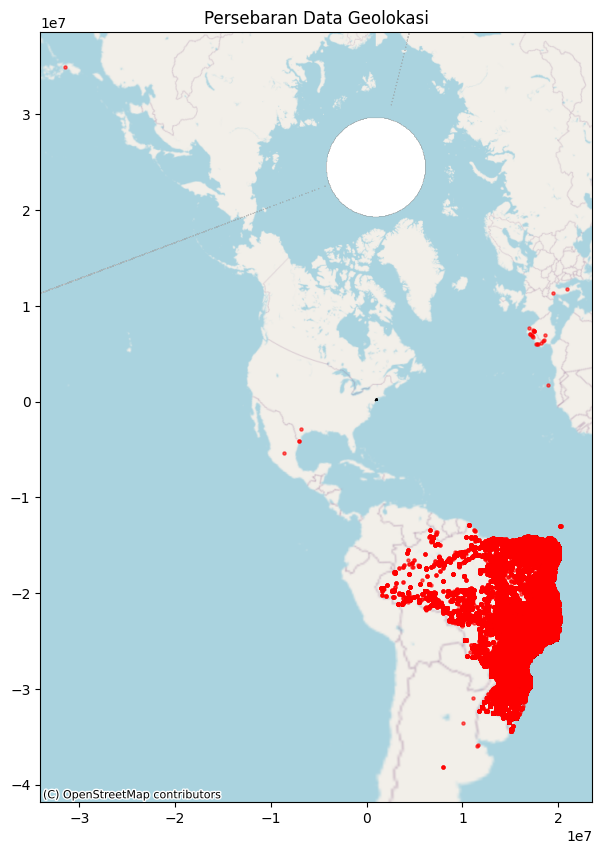

In [157]:
nybb_path = get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)


if {'geolocation_lng', 'geolocation_lat'}.issubset(geo_df.columns):
    gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.geolocation_lng, geo_df.geolocation_lat), crs='EPSG:4326')

    gdf = gdf.to_crs(boros.crs)

    fig, ax = plt.subplots(figsize=(10, 10))
    boros.plot(ax=ax, edgecolor='black', alpha=0.3)
    gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)
    ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

    ax.set_title("Persebaran Data Geolokasi")
    plt.show()
else:
    print("Dataset harus memiliki kolom 'geolocation_lng' dan 'geolocation_lat'.")


**Insight:**
- Pengelompokkan data dan sortir berdasarkan misal pada revieworder: customer_id dan order_status dihighlight berupa jumlah delivered dan canceled
- Penambahakan kolom pada revieworder_df berupa delivery_time (Waktupengiriman berdasarkan hari) dengan perhitungan order_delivered_customer_data dikurangi order_purchase_timestamp
- Highlight dari visualisasi secara sekilas persebaran customer di peta menggunakan geolocation dan geodatasets berdasarkan csv: geolocation_dataset.csv
- Penambahan kolom status pada revieworder_df dimana jika customer_id terdapat pada kolom dataset = Active
- Visualisasi delivery_time secara sekilas pada revieworder_df

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa penjualan dan revenue perusahaan dalam bulan terakhir?

In [158]:
import pandas as pd
# Gabungkan DataFrame berdasarkan kolom 'order_id'
merged3_df = pd.merge(sellerproduct_df, nameproduct_df, on='product_id', how='inner')
merged3_df = pd.merge(merged3_df, customerproduct_df, on='order_id', how='inner')
merged3_df = pd.merge(merged3_df, revieworder_df, on='order_id', how='inner')
pd.set_option("display.max_columns", None)
merged3_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,customer_id_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,97ca439bc427b48bc1cd7177abe71365,5,[Not include comment],"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,7b07bacd811c4117b742569b04ce3580,4,[Not include comment],[Not include comment],2017-05-13 00:00:00,2017-05-15 11:34:13,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,0c5b33dea94867d1ac402749e5438e8b,5,[Not include comment],Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,f4028d019cb58564807486a6aaf33817,4,[Not include comment],[Not include comment],2018-08-15 00:00:00,2018-08-15 16:39:01,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,940144190dcba6351888cafa43f3a3a5,5,[Not include comment],Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,Active


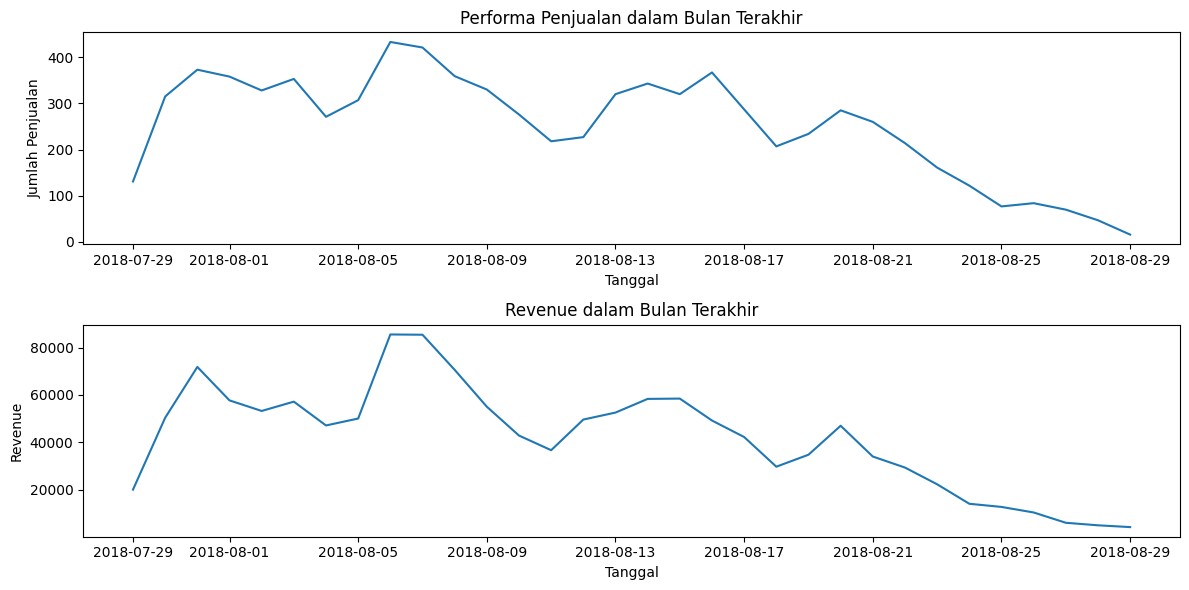

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

merged3_df['order_purchase_timestamp'] = pd.to_datetime(merged3_df['order_purchase_timestamp'])
last_month = merged3_df['order_purchase_timestamp'].max() - pd.DateOffset(months=1)
last_month_data = merged3_df[merged3_df['order_purchase_timestamp'] >= last_month]

daily_sales = last_month_data.groupby(last_month_data['order_purchase_timestamp'].dt.date)['order_id'].count()
daily_revenue = last_month_data.groupby(last_month_data['order_purchase_timestamp'].dt.date)['payment_value'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.title('Performa Penjualan dalam Bulan Terakhir')

plt.subplot(2, 1, 2)
plt.plot(daily_revenue.index, daily_revenue.values)
plt.xlabel('Tanggal')
plt.ylabel('Revenue')
plt.title('Revenue dalam Bulan Terakhir')

plt.tight_layout()
plt.show()


### Pertanyaan 2: Penjualan Dengan produk paling tinggi dan paling rendah

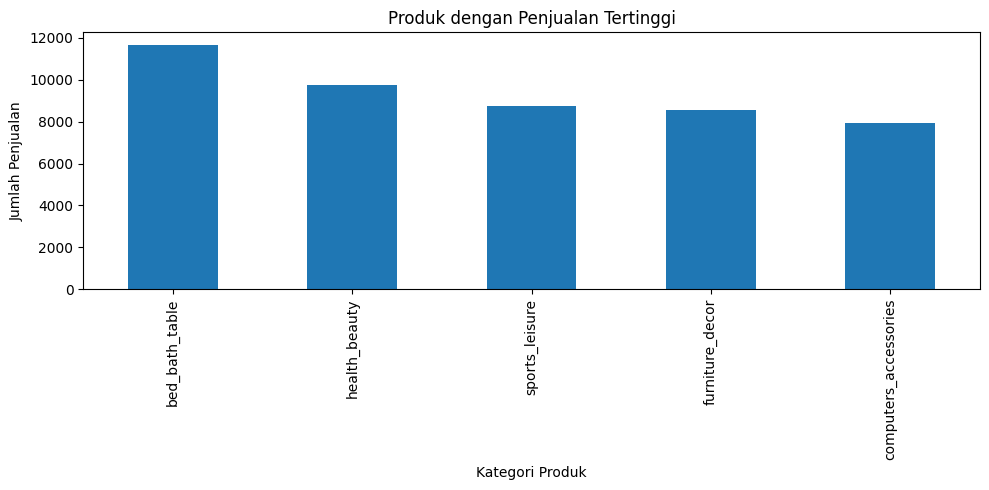

In [160]:
import matplotlib.pyplot as plt

product_sales = merged3_df.groupby('product_category_name_english')['order_id'].count()


top_products = product_sales.nlargest(5)


plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', title='Produk dengan Penjualan Tertinggi')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')
plt.tight_layout()
plt.show()


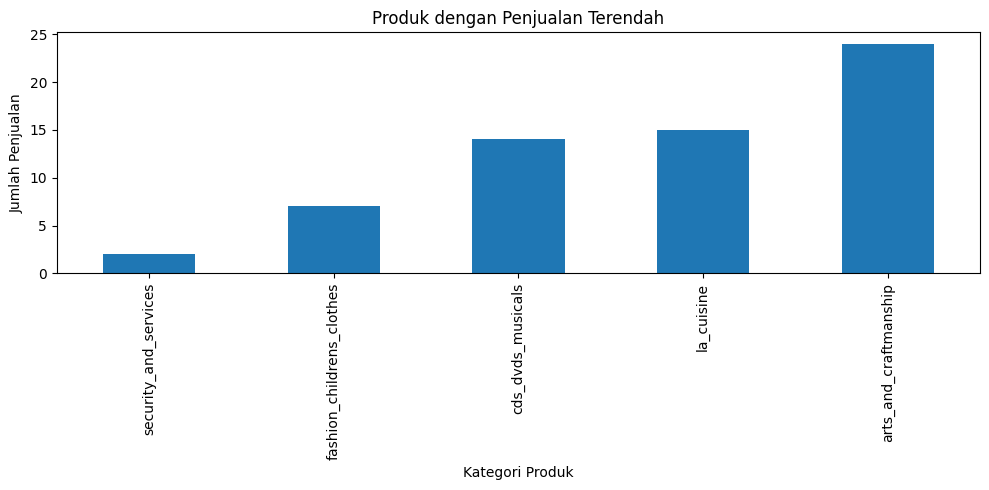

In [161]:
import matplotlib.pyplot as plt

product_sales = merged3_df.groupby('product_category_name_english')['order_id'].count()


bottom_products = product_sales.nsmallest(5)

plt.figure(figsize=(10, 5))
bottom_products.plot(kind='bar', title='Produk dengan Penjualan Terendah')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')
plt.tight_layout()
plt.show()


**Insight:**
- Produk penjualan tertinggi yakni : bed_bath_table dan terendah : security_and_services
- Performa tertinggi pada penjualan perusahaan pada waktu : 5 Agustus sampai 9 Agustus 2018

## Conclusion

- Conclution pertanyaan 1 :
Performa tertinggi pada penjualan perusahaan pada waktu : 5 Agustus sampai 9 Agustus 2018 dan terendah 28 Agustus.
- Conclution pertanyaan 2 :
Produk dengan Penjualan Tertinggi: Kategori produk bed_bath_table memiliki penjualan tertinggi. Hal ini menunjukkan tingginya permintaan pelanggan terhadap produk-produk dalam kategori tersebut.
Produk dengan Penjualan Terendah: Kategori produk security_and_services memiliki penjualan terendah. Penjualan yang rendah bisa disebabkan oleh berbagai faktor, seperti kurangnya minat pasar, harga yang kurang kompetitif, atau strategi pemasaran yang kurang efektif.